<a href="https://colab.research.google.com/github/jake0403/SFY-TIL/blob/master/AI/practice01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
X = torch.rand(3,2,5)
Y = torch.rand(3,5,3)

D = X.matmul(Y) # 행렬 곱 (내적)
print(D)
print(D.shape)
# X.mul(Y)    # X*Y 와 동일. 각 원소 별로 곱하는 연산.

tensor([[[1.0779, 1.3160, 1.4654],
         [0.4574, 0.7797, 0.7615]],

        [[1.5339, 2.2895, 1.5037],
         [1.4157, 1.8386, 1.5820]],

        [[1.3420, 1.8027, 1.6045],
         [1.0898, 1.5255, 1.3709]]])
torch.Size([3, 2, 3])


In [10]:
# Study time
x_train = torch.FloatTensor([[10], [11], [14], [18], [19], [22], [24]])
# Grade
y_train = torch.FloatTensor([[45], [50], [55], [70], [58], [80], [85]])

print(x_train.shape, '|', x_train.dim())

torch.Size([7, 1]) | 2


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


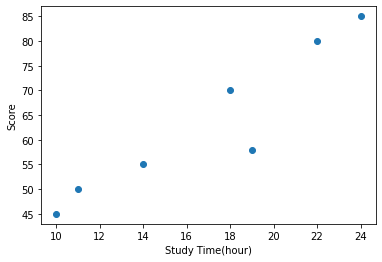

In [7]:
plt.scatter(x_train, y_train)
plt.xlabel('Study Time(hour)')
plt.ylabel("Score")
plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [9]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/health_data.csv')

data_file = pd.read_csv(path)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,3,169.2,NaN
4,4,154.0,49.275


In [11]:
# Null 값 제거
data_file = data_file.dropna(axis=0).reset_index(drop=True)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


In [15]:
height = torch.tensor(data_file.height)
weight = torch.tensor(data_file.weight)

x_train = height.view([height.shape[0], 1]).float()
y_train = weight.view([weight.shape[0], 1]).float()

print(x_train.shape)

torch.Size([50, 1])


In [17]:
x_train = torch.cat((torch.rand(50,1)*45 + 145, x_train), axis = 0)
y_train = torch.cat((torch.rand(50,1)*45 + 40, y_train), axis = 0)

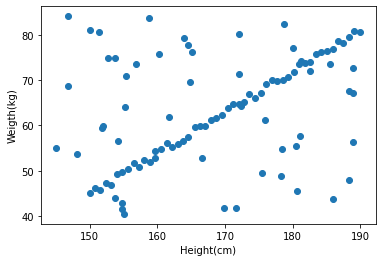

In [18]:
plt.scatter(x_train, y_train)
plt.xlabel('Height(cm)')
plt.ylabel("Weigth(kg)")
plt.show()

In [28]:
iter = 50000    # loss 값을 구하는 횟수로 총 5만번

weight_max = 100    #'[입력범위]'로 random값의 weight 범위 제한 목적 ( -50 < weight < 50 )
bias_max = 150      #오프셋으로 random값의 bias 범위 제한 목적 (-150 < bias < 0)
min_loss = 10000000   #업데이트 된 가장 작은 값의 loss 저장

min_w = 0
min_b = 0

# dataset
x = x_train
y = y_train

def loss_fn(hypo, GT):
    return sum(abs(hypo - GT))

for i in range(iter):
    W = (torch.rand(1) - 0.5) * weight_max    # [-50 ~ 50]
    b = (-torch.rand(1)) * bias_max           # [-150 ~ 0]
    hypothesis = x * W + b

    cur_loss = loss_fn(hypothesis, y)

    if cur_loss < min_loss:
      min_loss = cur_loss
      min_w = W
      min_b = b

print(f'min_loss : {min_loss}')
print(f'min_w : {min_w}')
print(f'min_b : {min_b}')

min_loss : tensor([832.3812])
min_w : tensor([0.6748])
min_b : tensor([-51.2477])


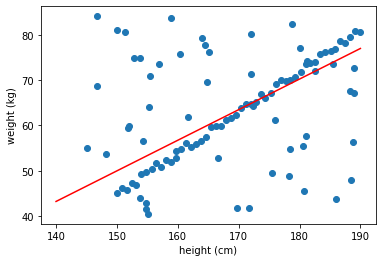

In [29]:
x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140., 190., 0.001)

plt.plot(t, min_w*t+min_b, 'r')
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()